### Chapter 1. 데이터 전처리

1. 데이터 불러오기
2. 데이터 타입 확인
3. 데이터 결측치 확인 (데이터 정제 I)
4. 데이터 결측치 대체 (데이터 정제 II)
5. 데이터 합치기
6. 데이터 인덱싱
7. 이탈 데이터 전처리 : 일별 데이터 -> 월별 데이터

In [1]:
import pandas as pd
import numpy as np

import os

### 경로 관련

In [24]:
# 현재 프로세스의 작업 디렉토리 확인
cur_dir = os.getcwd()
print(cur_dir)

# 현재 작업파일의 경로에 있는 리스트 확인 -> 리스트로 반환
dir_list = os.listdir(cur_dir)
print(dir_list)

# 특정 경로의 폴더(디렉토리) 생성
#os.mkdir(cur_dir + '/dataset')

# 지정한 파일의 이름을 변경
#os.rename('test', 'tteesstt')

# 지정된 경로의 디렉토리를 순차적으로 탐색 -> 주로 for문과 활용
# for i in os.walk(cur_dir):
#     print(i)

for dirpath, folder, file in os.walk(cur_dir):
    print(dirpath, '\n', folder, '\n', file)

C:\Users\pg627\workspace\캘리퍼 데이터 활용 개발 실습\chapter 1. 실습용 코드
['.ipynb_checkpoints', 'chapter 1. 실습용 코드.ipynb', 'dataset', 'tteesstt']
C:\Users\pg627\workspace\캘리퍼 데이터 활용 개발 실습\chapter 1. 실습용 코드 
 ['.ipynb_checkpoints', 'dataset', 'tteesstt'] 
 ['chapter 1. 실습용 코드.ipynb']
C:\Users\pg627\workspace\캘리퍼 데이터 활용 개발 실습\chapter 1. 실습용 코드\.ipynb_checkpoints 
 [] 
 ['chapter 1. 실습용 코드-checkpoint.ipynb']
C:\Users\pg627\workspace\캘리퍼 데이터 활용 개발 실습\chapter 1. 실습용 코드\dataset 
 [] 
 []
C:\Users\pg627\workspace\캘리퍼 데이터 활용 개발 실습\chapter 1. 실습용 코드\tteesstt 
 [] 
 []


### 특정 경로의 파일 리스트 확인

In [28]:
data_list = os.listdir(cur_dir + '/dataset/Dropout')
print("데이터셋 목록(data_list) : ", data_list)

데이터셋 목록(data_list) :  ['df1.csv', 'df2.csv', 'df3.csv', 'df4.csv', 'Dropout.csv', 'member.csv', '테이블명세서_dropout.csv']


### 데이터 불러오기 type 1 -> dict 형태로 반환

In [32]:
Dataset = dict()

for data in data_list:
    print(data)
    Dataset[data[0:-4]] = pd.read_csv(cur_dir + f"\\dataset\\Dropout\\{data}", index_col = 0, encoding='cp949')
    #key값

df1.csv
df2.csv
df3.csv
df4.csv
Dropout.csv
member.csv
테이블명세서_dropout.csv


### 데이터 불러오기 type 2 -> dataframe 형태로 각각 반환

In [39]:
df1 = Dataset['df1']
df2 = Dataset['df2']
df3 = Dataset['df3']
df4 = Dataset['df4']
member = Dataset['member']

In [42]:
df1

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification
ID,,,,,,
37c5fefa-df8e-4dcc-aec7-60000f2198e4,1.0,8.0,5.0,2.0,1.0,1.0
37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,1.0,6.0,1.0,11.0,1.0,1.0
37ddd4c5-ab63-4b43-8df7-24e98f39f25b,1.0,1.0,5.0,5.0,1.0,1.0
37fafa03-d77a-4723-89aa-84a8277379c5,1.0,8.0,2.0,15.0,1.0,1.0
382cc9e8-e885-4bcd-ae4d-a3846c35097b,2.0,12.0,1.0,3.0,0.0,1.0
...,...,...,...,...,...,...
e7592d77-b53d-4496-a276-0fb6afdd7265,1.0,1.0,6.0,15.0,1.0,1.0
e76231d5-8450-4424-b344-daac4b02845b,1.0,1.0,2.0,15.0,1.0,1.0
e77542f6-e166-46a6-ba62-903e0740631e,1.0,1.0,1.0,12.0,1.0,1.0


### 데이터 합치기

In [41]:
pd.concat([df1,df2,df3,df4,member], axis=1)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Nacionality,Gender,Target
ID,,,,,,,,,,,,,,,,,,,,,
37c5fefa-df8e-4dcc-aec7-60000f2198e4,1.0,8.0,5.0,2.0,1.0,1.0,13.0,10.0,6.0,10.0,...,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,Portuguese,Male,Dropout
37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,1.0,6.0,1.0,11.0,1.0,1.0,1.0,3.0,4.0,4.0,...,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79,Portuguese,Male,Graduate
37ddd4c5-ab63-4b43-8df7-24e98f39f25b,1.0,1.0,5.0,5.0,1.0,1.0,22.0,27.0,10.0,10.0,...,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,Portuguese,Male,Dropout
37fafa03-d77a-4723-89aa-84a8277379c5,1.0,8.0,2.0,15.0,1.0,1.0,23.0,27.0,6.0,4.0,...,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12,Portuguese,Female,Graduate
382cc9e8-e885-4bcd-ae4d-a3846c35097b,2.0,12.0,1.0,3.0,0.0,1.0,22.0,28.0,10.0,10.0,...,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79,Portuguese,Female,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e7592d77-b53d-4496-a276-0fb6afdd7265,1.0,1.0,6.0,15.0,1.0,1.0,1.0,1.0,6.0,5.0,...,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06,Portuguese,Male,Graduate
e76231d5-8450-4424-b344-daac4b02845b,1.0,1.0,2.0,15.0,1.0,1.0,1.0,1.0,10.0,10.0,...,6.0,2.0,11.000000,0.0,11.1,0.6,2.02,Russian,Female,Dropout
e77542f6-e166-46a6-ba62-903e0740631e,1.0,1.0,1.0,12.0,1.0,1.0,22.0,27.0,10.0,10.0,...,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79,Portuguese,Female,Dropout


In [534]:
dropout = pd.merge(member, df1, how='left', left_on=['ID'], right_on=['ID'])
dropout = pd.merge(dropout, df2, how='left', left_on=['ID'], right_on=['ID'])
dropout = pd.merge(dropout, df3, how='left', left_on=['ID'], right_on=['ID'])
dropout = pd.merge(dropout, df4, how='left', left_on=['ID'], right_on=['ID'])

In [73]:
dropout.head()

,Nacionality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
ID,,,,,,,,,,,,,,,,,,,,,
37c5fefa-df8e-4dcc-aec7-60000f2198e4,Portuguese,Male,Dropout,1.0,8.0,5.0,2.0,1.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,Portuguese,Male,Graduate,1.0,6.0,1.0,11.0,1.0,1.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
37ddd4c5-ab63-4b43-8df7-24e98f39f25b,Portuguese,Male,Dropout,1.0,1.0,5.0,5.0,1.0,1.0,22.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
37fafa03-d77a-4723-89aa-84a8277379c5,Portuguese,Female,Graduate,1.0,8.0,2.0,15.0,1.0,1.0,23.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
382cc9e8-e885-4bcd-ae4d-a3846c35097b,Portuguese,Female,Graduate,2.0,12.0,1.0,3.0,0.0,1.0,22.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79


### 테이블 컬럼 타입 확인

In [46]:
dropout.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4424 entries, 37c5fefa-df8e-4dcc-aec7-60000f2198e4 to e8367558-40d6-4ec6-99a8-e9b2541fdc9b
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Nacionality                                     4397 non-null   object 
 1   Gender                                          4397 non-null   object 
 2   Target                                          4416 non-null   object 
 3   Marital status                                  4405 non-null   float64
 4   Application mode                                4399 non-null   float64
 5   Application order                               4395 non-null   float64
 6   Course                                          4403 non-null   float64
 7   Daytime/evening attendance                      4407 non-null   float64
 8   Previous qualification                          4403 non

### 데이터프레임 내의 값 변경

In [48]:
dropout.Nacionality.unique()

array(['Portuguese', 'Romanian', nan, 'Spanish', 'Brazilian', 'Santomean',
       'Ukrainian', 'Dutch', 'Mozambican', 'Angolan', 'Mexican',
       'Italian', 'Cape Verdean', 'Turkish', 'Moldova', 'Guinean',
       'Colombian', 'German', 'Cuban', 'Russian', 'English', 'Lithuanian'],
      dtype=object)

In [49]:
def change_value(values):
    if values == 'Portuguese':
        return 1
    elif values == 'German':
        return 2
    elif values == 'Spanish':
        return 3
    elif values == 'Italian':
        return 4
    elif values == 'Dutch':
        return 5
    elif values == 'English':
        return 6
    elif values == 'Lithuanian':
        return 7
    elif values == 'Angolan':
        return 8
    elif values == 'Cape Verdean':
        return 9
    elif values == 'Guinean':
        return 10
    elif values == 'Mozambican':
        return 11
    elif values == 'Santomean':
        return 12
    elif values == 'Turkish':
        return 13
    elif values == 'Brazilian':
        return 14
    elif values == 'Romanian':
        return 15
    elif values == 'Moldova':
        return 16
    elif values == 'Mexican':
        return 17
    elif values == 'Ukrainian':
        return 18
    elif values == 'Russian':
        return 19
    elif values == 'Cuban':
        return 20
    elif values == 'Colombian':
        return 21

In [181]:
dropout.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled', nan], dtype=object)

In [182]:
def change_gender(values):
    if values == 'Male':
        return 0
    else:
        return 1
    
def change_target(values):
    if values == 'Dropout':
        return 0
    elif values == 'Graduate':
        return 1
    elif values == 'Enrolled':
        return 2

### 데이터 값 변경 version 1 -> 함수/apply 사용

In [78]:
dropout['Nacionality'] = dropout['Nacionality'].apply(change_value)

In [183]:
dropout['Gender'] = dropout['Gender'].apply(change_gender)
dropout['Target'] = dropout['Target'].apply(change_target)

In [186]:
dropout

,ID,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,37c5fefa-df8e-4dcc-aec7-60000f2198e4,1.0,0,0.0,1.0,8.0,5.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,1.0,0,1.0,1.0,6.0,1.0,11.0,1.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,37ddd4c5-ab63-4b43-8df7-24e98f39f25b,1.0,0,0.0,1.0,1.0,5.0,5.0,1.0,1.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,37fafa03-d77a-4723-89aa-84a8277379c5,1.0,1,1.0,1.0,8.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,382cc9e8-e885-4bcd-ae4d-a3846c35097b,1.0,1,1.0,2.0,12.0,1.0,3.0,0.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,e7592d77-b53d-4496-a276-0fb6afdd7265,1.0,0,1.0,1.0,1.0,6.0,15.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4420,e76231d5-8450-4424-b344-daac4b02845b,19.0,1,0.0,1.0,1.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4421,e77542f6-e166-46a6-ba62-903e0740631e,1.0,1,0.0,1.0,1.0,1.0,12.0,1.0,1.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4422,e7d809db-983c-4db5-b32a-64698a39a5aa,1.0,1,1.0,1.0,1.0,1.0,9.0,1.0,1.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


In [185]:
dropout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              4424 non-null   object 
 1   Nationality                                     4397 non-null   float64
 2   Gender                                          4424 non-null   int64  
 3   Target                                          4416 non-null   float64
 4   Marital status                                  4405 non-null   object 
 5   Application mode                                4399 non-null   object 
 6   Application order                               4395 non-null   float64
 7   Course                                          4403 non-null   object 
 8   Daytime/evening attendance                      4407 non-null   object 
 9   Previous qualification                   

### 데이터 컬럼 추가

#### - 빈 컬럼 생성 version 1
-> DataFrame['추가하고 싶은 컬럼명'] = '컬럼값'

In [79]:
dropout['Nationality'] = 0

In [54]:
dropout.head()

,Nacionality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Nationality
ID,,,,,,,,,,,,,,,,,,,,,
37c5fefa-df8e-4dcc-aec7-60000f2198e4,1.0,Male,Dropout,1.0,8.0,5.0,2.0,1.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,0
37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,1.0,Male,Graduate,1.0,6.0,1.0,11.0,1.0,1.0,1.0,...,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79,0
37ddd4c5-ab63-4b43-8df7-24e98f39f25b,1.0,Male,Dropout,1.0,1.0,5.0,5.0,1.0,1.0,22.0,...,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,0
37fafa03-d77a-4723-89aa-84a8277379c5,1.0,Female,Graduate,1.0,8.0,2.0,15.0,1.0,1.0,23.0,...,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12,0
382cc9e8-e885-4bcd-ae4d-a3846c35097b,1.0,Female,Graduate,2.0,12.0,1.0,3.0,0.0,1.0,22.0,...,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79,0


#### - 빈 컬럼 생성 version 2
-> insert(loc = 넣고 싶은 새로운 컬럼의 위치, column = 추가하고 싶은 새로운 컬럼명, value = 새로운 컬럼의 값)

In [64]:
dropout.insert(loc=2, column = 'Nationality_re', value=999)

In [65]:
dropout

,Nacionality,Gender,Nationality_re,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Nationality
ID,,,,,,,,,,,,,,,,,,,,,
37c5fefa-df8e-4dcc-aec7-60000f2198e4,1.0,Male,999,Dropout,1.0,8.0,5.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,0
37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,1.0,Male,999,Graduate,1.0,6.0,1.0,11.0,1.0,1.0,...,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79,0
37ddd4c5-ab63-4b43-8df7-24e98f39f25b,1.0,Male,999,Dropout,1.0,1.0,5.0,5.0,1.0,1.0,...,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,0
37fafa03-d77a-4723-89aa-84a8277379c5,1.0,Female,999,Graduate,1.0,8.0,2.0,15.0,1.0,1.0,...,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12,0
382cc9e8-e885-4bcd-ae4d-a3846c35097b,1.0,Female,999,Graduate,2.0,12.0,1.0,3.0,0.0,1.0,...,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e7592d77-b53d-4496-a276-0fb6afdd7265,1.0,Male,999,Graduate,1.0,1.0,6.0,15.0,1.0,1.0,...,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06,0
e76231d5-8450-4424-b344-daac4b02845b,19.0,Female,999,Dropout,1.0,1.0,2.0,15.0,1.0,1.0,...,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02,0
e77542f6-e166-46a6-ba62-903e0740631e,1.0,Female,999,Dropout,1.0,1.0,1.0,12.0,1.0,1.0,...,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79,0


In [71]:
dropout = dropout.drop('Nationality_re', axis = 1)

### 데이터 값 변경 version 2 -> loc 사용

In [74]:
dropout.head(3)

,Nacionality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
ID,,,,,,,,,,,,,,,,,,,,,
37c5fefa-df8e-4dcc-aec7-60000f2198e4,Portuguese,Male,Dropout,1.0,8.0,5.0,2.0,1.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,Portuguese,Male,Graduate,1.0,6.0,1.0,11.0,1.0,1.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
37ddd4c5-ab63-4b43-8df7-24e98f39f25b,Portuguese,Male,Dropout,1.0,1.0,5.0,5.0,1.0,1.0,22.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74


In [75]:
dropout.loc[dropout['Nacionality']=='Portuguese', 'Nationality_rere'] = 1

In [76]:
dropout.head(3)

,Nacionality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Nationality_rere
ID,,,,,,,,,,,,,,,,,,,,,
37c5fefa-df8e-4dcc-aec7-60000f2198e4,Portuguese,Male,Dropout,1.0,8.0,5.0,2.0,1.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,1.0
37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,Portuguese,Male,Graduate,1.0,6.0,1.0,11.0,1.0,1.0,1.0,...,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79,1.0
37ddd4c5-ab63-4b43-8df7-24e98f39f25b,Portuguese,Male,Dropout,1.0,1.0,5.0,5.0,1.0,1.0,22.0,...,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,1.0


### 컬럼별 중복 제거 개수

In [82]:
len(dropout['Nacionality'].unique())

22

In [85]:
columns_info = dict()

columns = dropout.columns
print(colums)

for col in columns:
    columns_info[col] = len(dropout[col].unique())
    
print(columns_info)

Index(['Nacionality', 'Gender', 'Target', 'Marital status', 'Application mode',
       'Application order', 'Course', 'Daytime/evening attendance',
       'Previous qualification', 'Mother's qualification',
       'Father's qualification', 'Mother's occupation', 'Father's occupation',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Scholarship holder', 'Age at enrollment',
       'International', 'Education', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd se

### 데이터 컬럼 탐색

In [535]:
dropout = dropout.rename(columns = {'Nacionality' : 'Nationality'})

In [90]:
dropout = dropout.iloc[:,:-1]

In [93]:
dropout_action_cnt = dropout.groupby(['Nationality', 'Target']).size().reset_index().pivot(columns = 'Target', index = 'Nationality', values=0)
dropout_action_cnt = dropout_action_cnt.rename(index = {1: '포르투갈', 2:'독일'})

In [94]:
dropout_action_cnt

Target,Dropout,Enrolled,Graduate
Nationality,,,
포르투갈,1373.0,767.0,2147.0
독일,NaN,NaN,2.0
3.0,4.0,5.0,4.0
4.0,NaN,NaN,3.0
5.0,NaN,NaN,1.0
6.0,NaN,NaN,1.0
7.0,1.0,NaN,NaN
8.0,1.0,1.0,NaN
9.0,4.0,1.0,8.0


### 데이터 컬럼 타입 변경

In [537]:
dropout = dropout.reset_index()

In [539]:
dropout = dropout.astype({"Nationality" : 'object',
                          "Gender" : 'object',
                          "Target" : 'object',
                          "Marital status" : 'object',
                         "Application mode" : 'object',
                         "Course" : 'object',
                         "Daytime/evening attendance" : 'object',
                         "Previous qualification" : 'object',
                         "Mother's qualification" : 'object',
                         "Father's qualification" : 'object',
                         "Mother's occupation" : 'object',
                         "Father's occupation" : 'object',
                         "Displaced" : 'object',
                         "Educational special needs" : 'object',
                         "Debtor" : 'object',
                         "Tuition fees up to date" : 'object',
                         "Scholarship holder" : 'object',
                         "International" : 'object'})
dropout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              4424 non-null   object 
 1   Nationality                                     4397 non-null   object 
 2   Gender                                          4397 non-null   object 
 3   Target                                          4416 non-null   object 
 4   Marital status                                  4405 non-null   object 
 5   Application mode                                4399 non-null   object 
 6   Application order                               4395 non-null   float64
 7   Course                                          4403 non-null   object 
 8   Daytime/evening attendance                      4407 non-null   object 
 9   Previous qualification                   

In [100]:
dropout

,ID,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,37c5fefa-df8e-4dcc-aec7-60000f2198e4,1.0,Male,Dropout,1.0,8.0,5.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,1.0,Male,Graduate,1.0,6.0,1.0,11.0,1.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,37ddd4c5-ab63-4b43-8df7-24e98f39f25b,1.0,Male,Dropout,1.0,1.0,5.0,5.0,1.0,1.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,37fafa03-d77a-4723-89aa-84a8277379c5,1.0,Female,Graduate,1.0,8.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,382cc9e8-e885-4bcd-ae4d-a3846c35097b,1.0,Female,Graduate,2.0,12.0,1.0,3.0,0.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,e7592d77-b53d-4496-a276-0fb6afdd7265,1.0,Male,Graduate,1.0,1.0,6.0,15.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4420,e76231d5-8450-4424-b344-daac4b02845b,19.0,Female,Dropout,1.0,1.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4421,e77542f6-e166-46a6-ba62-903e0740631e,1.0,Female,Dropout,1.0,1.0,1.0,12.0,1.0,1.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4422,e7d809db-983c-4db5-b32a-64698a39a5aa,1.0,Female,Graduate,1.0,1.0,1.0,9.0,1.0,1.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


### 결측치 확인
- 컬럼별 결측 비율 확인

# ------------------------------------------------------------------------------------------------------------

## 결측치 처리

###  머신러닝 및 데이터 분석에서 상황과 목적에 맞게 처리해야 하는 중요한 프로세스 중 하나



1. 결측치 비율이 10% 미만인 경우
- 삭제 가능
<p>


2. 결측치 비율이 30% ~ 50%인 경우
- 삭제 위험
<p>


3. 결측치 비율이 50% 이상인 경우
- 데이터 자체에 대한 추가 검증 필요 or 해당 컬럼의 제거 고려
<p> 
    
==============================
### * 결측치를 처리하는 방법은 다양
    
1. 제거
- 한개 이상의 결측치가 있는 모든 행 제거
    
2. 대치
- 결측치를 특정값(평균, 최소, 최대, 최반값 등등)으로 대체
    
3. 보간법
- 추세를 결측치 이외의 값들을 선형적으로 같은 간격으로 처리 (시계열 데이터에 적합)

#### Target 변수에 결측치가 있는 행 일괄 제거
- target 변수에는 결측치가 있어서는 안된다!!!

In [108]:
# target 변수의 결측치 유무 확인 -> 데이터프레임 형태로 번환 후 확인
null_cnt_df = pd.DataFrame(dropout.isnull().sum()).rename(columns= {0: 'null_count'}).reset_index()
null_cnt_df['null_ratio'] = round(null_cnt_df['null_count']/len(dropout)*100, 2)
null_cnt_df

,index,null_count,null_ratio
0,ID,0,0.00
1,Nationality,27,0.61
2,Gender,27,0.61
3,Target,8,0.18
4,Marital status,19,0.43
5,Application mode,25,0.57
6,Application order,29,0.66
7,Course,21,0.47
8,Daytime/evening attendance,17,0.38
9,Previous qualification,21,0.47


In [540]:
# target 변수에 결측이 있는 row 제거
# dropout.dropna(subset=['Target'])
dropout_remove = dropout[dropout['Target'].isnull() == False]

## * 결측치 1차 제거 -> 행 제거

- dropna() 함수 사용
1. axis = 0/1 (0 : 행, 1 : 열)
2. how = 'any' / 'all' (any : 행/열 중 하나라도 있는 경우 제거, all : 모든 행/열이 결측인 경우 제거)

3. dropna(thresh = num) : 행의 결측치 개수가 num개 이상인 행 제거

4. subset = 특정 변수 지정 / 지정하지 않을 경우 : 모든 columne & row에 적용

In [541]:
# 행을 기준으로 결측치가 2개 이상인 행 제거
dropout_remove = dropout_remove.dropna(axis=0, thresh=2)

In [542]:
# 행을 기준으로 모두 결측인 case 제거
dropout_remove = dropout_remove.dropna(axis=0, how='all')

In [543]:
# 약 4천개의 행중에서 3000개 이상 결측인 컬럼 제거 -> "Education" 컬럼 제거 됨
dropout_remove = dropout_remove.dropna(axis=1, thresh=3000)

## * 결측치 특정값 대치(imputation)

1. 최빈값 : 범주형 변수의 경우 (가장 비율이 높은 범주로 대치 가능)

2. 중앙값 : 연속형 변수의 경우 중앙값으로 대치 가능

3. 평균 : 연속형 변수의 경우 평균값으로 대치 가능

4. 임의 지정 : 사용자가 원하는 수치로 대치 가능

### 특정값 대치 version 1 -> fillna() 함수 사용

#### 타입별 컬럼 리스트 재정의
- 1. float64 타입에 해당하는 컬럼 리스트 반환
- 2. Object 타입에 해당하는 컬럼 리스트 반환

In [529]:
# 각 타입별 컬럼 리스트를 딕셔너리 형태로 반환

# ex) {'object' : ['col1', 'col2'...], 'float64' : ['col3', 'col4'...]}
columns_type_list = dropout_remove.columns.to_series().groupby(dropout_remove.dtypes).groups
columns_type_list = {types.name : list(cols) for types, cols in columns_type_list.items()}
columns_type_list

{'float64': ['Application order',
  'Age at enrollment',
  'Curricular units 1st sem (credited)',
  'Curricular units 1st sem (enrolled)',
  'Curricular units 1st sem (evaluations)',
  'Curricular units 1st sem (approved)',
  'Curricular units 1st sem (grade)',
  'Curricular units 1st sem (without evaluations)',
  'Curricular units 2nd sem (credited)',
  'Curricular units 2nd sem (enrolled)',
  'Curricular units 2nd sem (evaluations)',
  'Curricular units 2nd sem (approved)',
  'Curricular units 2nd sem (grade)',
  'Curricular units 2nd sem (without evaluations)',
  'Unemployment rate',
  'Inflation rate',
  'GDP'],
 'object': ['ID',
  'Nationality',
  'Gender',
  'Target',
  'Marital status',
  'Application mode',
  'Course',
  'Daytime/evening attendance',
  'Previous qualification',
  "Mother's qualification",
  "Father's qualification",
  "Mother's occupation",
  "Father's occupation",
  'Displaced',
  'Educational special needs',
  'Debtor',
  'Tuition fees up to date',
  'Scholar

In [509]:
# float64 타입에 해당하는 컬럼 리스트 반환
float_list = columns_type_list['float64']
# object 타입에 해당하는 컬럼 리스트 반환
object_list = columns_type_list['object']

### * float 타입 컬럼 결측치 대치

#### 1. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 평균값으로 대치

In [549]:
for col in float_list:
    means = dropout_remove[col].mean()
    dropout_remove[col] = dropout_remove[col].fillna(means)

#### 2. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 최대값으로 대치

- idxmax() : 최대값을 가지는 인덱스 레이블을 출력
- max() : 최대값 출력

In [141]:
for col in float_list:
    max_val = dropout_remove[col].max()
    dropout_remove[col] = dropout_remove[col].fillna(max_val)

#### 3. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 최소값으로 대치
- idxmin() : 최소값을 가지는 인덱스 레이블을 출력
- min() : 최소값을 출력

In [142]:
for col in float_list:
    min_val = dropout_remove[col].min()
    dropout_remove[col] = dropout_remove[col].fillna(min_val)

In [524]:
dropout_remove

,ID,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,37c5fefa-df8e-4dcc-aec7-60000f2198e4,1.0,0,0.0,1.0,8.0,5.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,1.0,0,1.0,1.0,6.0,1.0,11.0,1.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,37ddd4c5-ab63-4b43-8df7-24e98f39f25b,1.0,0,0.0,1.0,1.0,5.0,5.0,1.0,1.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,37fafa03-d77a-4723-89aa-84a8277379c5,1.0,1,1.0,1.0,8.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,382cc9e8-e885-4bcd-ae4d-a3846c35097b,1.0,1,1.0,2.0,12.0,1.0,3.0,0.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,e7592d77-b53d-4496-a276-0fb6afdd7265,1.0,0,1.0,1.0,1.0,6.0,15.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4420,e76231d5-8450-4424-b344-daac4b02845b,19.0,1,0.0,1.0,1.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4421,e77542f6-e166-46a6-ba62-903e0740631e,1.0,1,0.0,1.0,1.0,1.0,12.0,1.0,1.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4422,e7d809db-983c-4db5-b32a-64698a39a5aa,1.0,1,1.0,1.0,1.0,1.0,9.0,1.0,1.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


#### 4. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 최빈값으로 대치 version 1 -> -> value_counts() + idxmax() 함수 사용

In [513]:
for col in float_list:
    freq_max_val = dropout_remove[col].value_counts().idxmax()
    dropout_remove[col] = dropout_remove[col].fillna(freq_max_val)

#### 5. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 최빈값으로 대치 version 2 -> mode() 함수 사용

In [145]:
for col in float_list:
    most_freq_val = dropout_remove[col].mode()
    dropout_remove[col] = dropout_remove[col].fillna(most_freq_val)

#### 6. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 바로 위 값으로 대치 -> fillna(method = 'ffill')
- 데이터 특성상 서로 이웃한 데이터끼리 유사성이 높을 수 있다고 간주될 때 사용

In [162]:
for col in float_list:
    dropout_remove[col] = dropout_remove[col].fillna(method = 'ffill')

#### 7. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 바로 아래 값으로 대치 -> fillna(method = 'bfill')
- 데이터 특성상 서로 이웃한 데이터끼리 유사성이 높을 수 있다고 간주될 때 사용

In [163]:
for col in float_list:
    dropout_remove[col] = dropout_remove[col].fillna(method = 'bfill')

#### 8. float 타입의 컬럼의 결측치를 분석가가 원하는 수치로 대치 가능 -> replace() 함수 사용
- to_replace : 바꾸고 싶은 값
- value : 바꾸고자 하는 값

In [166]:
# df.replace(to_replace = '바꾸고 싶은 값', value = '바꾸고자 하는 값')
dropout_remove = dropout_remove.replace(to_replace=np.nan, value=1)

#### 9. float 타입의 컬럼의 결측치를 성형적으로 같은 간격으로 처리 -> interpolate() 함수 사용 ### 시계열 데이터의 경우 사용 권장

In [168]:
# df.interpolate(method = '방법론', limit_direction = '보간 방향')
dropout_remove = dropout_remove.interpolate(method='linear', limit_direction='forward')

# ------------------------------------------------------------------------------------------------------------

### * object 타입 컬럼 결측치 대치

#### 1. object 타입의 컬럼의 결측치를 모두 각 컬럼의 최빈값으로 대치 version 1 -> value_counts() + idxmax() 함수 사용

In [547]:
for col in object_list:
    freq_max_val = dropout_remove[col].value_counts().idxmax()
    dropout_remove[col] = dropout_remove[col].fillna(freq_max_val)

#### 2. object 타입의 컬럼의 결측치를 모두 각 컬럼의 최빈값으로 대치 version 2 -> mode() 함수 사용

In [544]:
for col in object_list:
    most_freq_val = dropout_remove[col].mode()
    dropout_remove[col] = dropout_remove[col].fillna(most_freq_val)

#### 3. object 타입의 컬럼의 결측치를 모두 각 컬럼의 바로 위 값으로 대치 -> fillna(method = 'ffill')
- 데이터 특성상 서로 이웃한 데이터끼리 유사성이 높을 수 있다고 간주될 때 사용

In [172]:
for col in object_list:
    dropout_remove[col] = dropout_remove[col].fillna(method = 'ffill')

#### 4. object 타입의 컬럼의 결측치를 모두 각 컬럼의 바로 아래 값으로 대치 -> fillna(method = 'bfill')
- 데이터 특성상 서로 이웃한 데이터끼리 유사성이 높을 수 있다고 간주될 때 사용

In [173]:
for col in object_list:
    dropout_remove[col] = dropout_remove[col].fillna(method = 'bfill')

#### 5. object 타입의 컬럼의 결측치를 분석가가 원하는 값으로 대치 가능 -> replace() 함수 사용

In [178]:
for col in object_list:
    dropout_remove[col] = dropout_remove[col].replace(to_replace=np.nan, value='0')

In [532]:
dropout_remove

,ID,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,37c5fefa-df8e-4dcc-aec7-60000f2198e4,1.0,0,0.0,1.0,8.0,5.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,1.0,0,1.0,1.0,6.0,1.0,11.0,1.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,37ddd4c5-ab63-4b43-8df7-24e98f39f25b,1.0,0,0.0,1.0,1.0,5.0,5.0,1.0,1.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,37fafa03-d77a-4723-89aa-84a8277379c5,1.0,1,1.0,1.0,8.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,382cc9e8-e885-4bcd-ae4d-a3846c35097b,1.0,1,1.0,2.0,12.0,1.0,3.0,0.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,e7592d77-b53d-4496-a276-0fb6afdd7265,1.0,0,1.0,1.0,1.0,6.0,15.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4420,e76231d5-8450-4424-b344-daac4b02845b,19.0,1,0.0,1.0,1.0,2.0,15.0,1.0,1.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4421,e77542f6-e166-46a6-ba62-903e0740631e,1.0,1,0.0,1.0,1.0,1.0,12.0,1.0,1.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4422,e7d809db-983c-4db5-b32a-64698a39a5aa,1.0,1,1.0,1.0,1.0,1.0,9.0,1.0,1.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


In [550]:
dropout_remove.isnull().sum()

ID                                                0
Nationality                                       0
Gender                                            0
Target                                            0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Scholarship holder                                0
Age at enrol

# ------------------------------------------------------------------------------------------------------------

# 데이터 시각화

### 시각화 라이브러리

1. matplotlib
2. seaborn
3. plotly

In [187]:
import matplotlib.pyplot as plt
import matplotlib
# 그래프 타이틀 한글 출력
matplotlib.rcParams['font.family'] ='Malgun Gothic'

# 그래프 사이즈 지정
plt.rcParams['figure.figsize'] = [12, 8]

# 맥북에서
# from matplotlib import rc
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# Matplotlib로 원 그래프 그리기
- Target 학생 수 비율

In [202]:
dropout_remove['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [655]:
import matplotlib.pyplot as plt

In [654]:
dropout_remove['Target'].value_counts()

Graduate    2207
Dropout     1417
Enrolled     792
Name: Target, dtype: int64

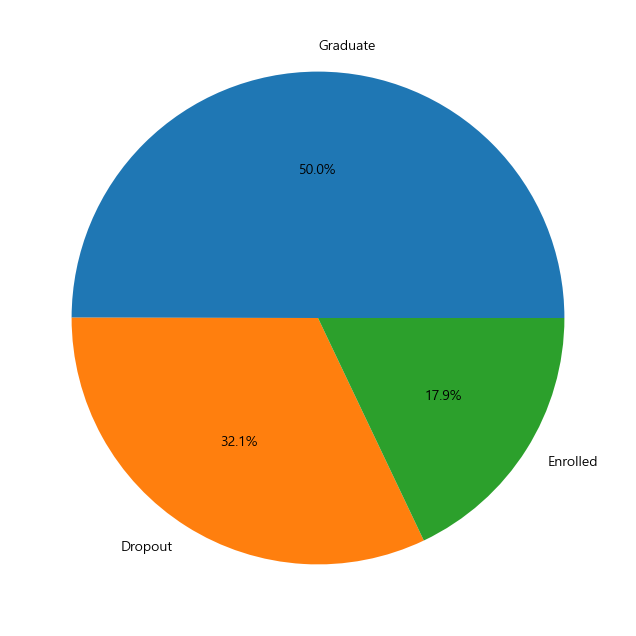

In [657]:
Target = dropout_remove['Target'].value_counts()

plt.pie(Target, labels = Target.index, autopct = '%2.1f%%')
#plt.title('Target 변수 비율')
plt.show()

TypeError: 'str' object is not callable

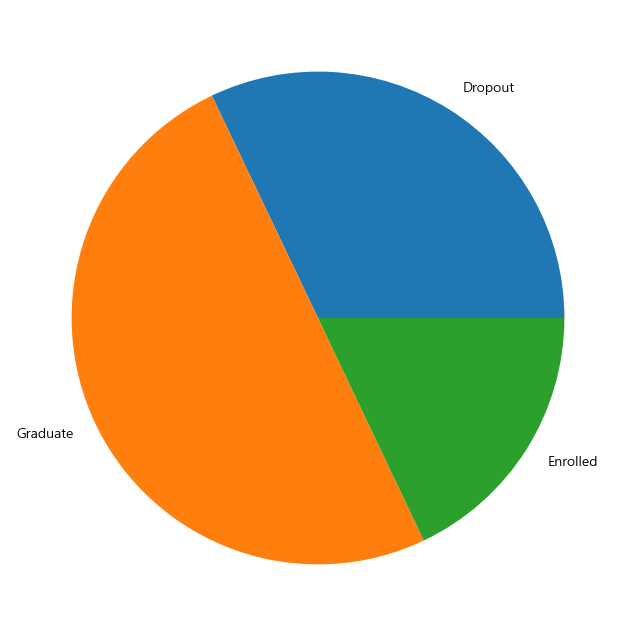

In [650]:
# 그래프 그리기
labels = ['Dropout', 'Graduate', 'Enrolled']
sizes = [sum(dropout_remove['Target']=='Dropout'), sum(dropout_remove['Target']=='Graduate'),
        sum(dropout_remove['Target']=='Enrolled')]

plt.pie(
    sizes,labels=labels
)
plt.title('Target 변수 비율')
plt.show()

# plotly로 원 그래프 그리기
- Target 학생 수 비율

In [206]:
import plotly.offline
import plotly.express as px
import plotly.graph_objs as go

In [285]:
# 그래프 
labels = ['Dropout', 'Graduate', 'Enrolled']
values = [sum(dropout_remove['Target']=='Dropout'), sum(dropout_remove['Target']=='Graduate'),
        sum(dropout_remove['Target']=='Enrolled')]

fig = px.pie(names=labels, values=values, title="Target 변수 비율", )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Seaborn으로 막대그래프 그리기
- Target별 성비

In [222]:
import seaborn as sns

In [256]:
dropout_remove.groupby(['Target', 'Gender']).count().ID.values

array([ 719,  698,  486,  306, 1661,  546], dtype=int64)

In [239]:
dropout_remove.Gender = dropout_remove.Gender.replace(to_replace=1, value='Female')

In [240]:
dropout_remove.Gender.unique()

array(['Male', 'Female'], dtype=object)

[Text(0.5, 0, '성별'), Text(0, 0.5, '학생 수'), Text(0.5, 1.0, 'Target별 성비')]

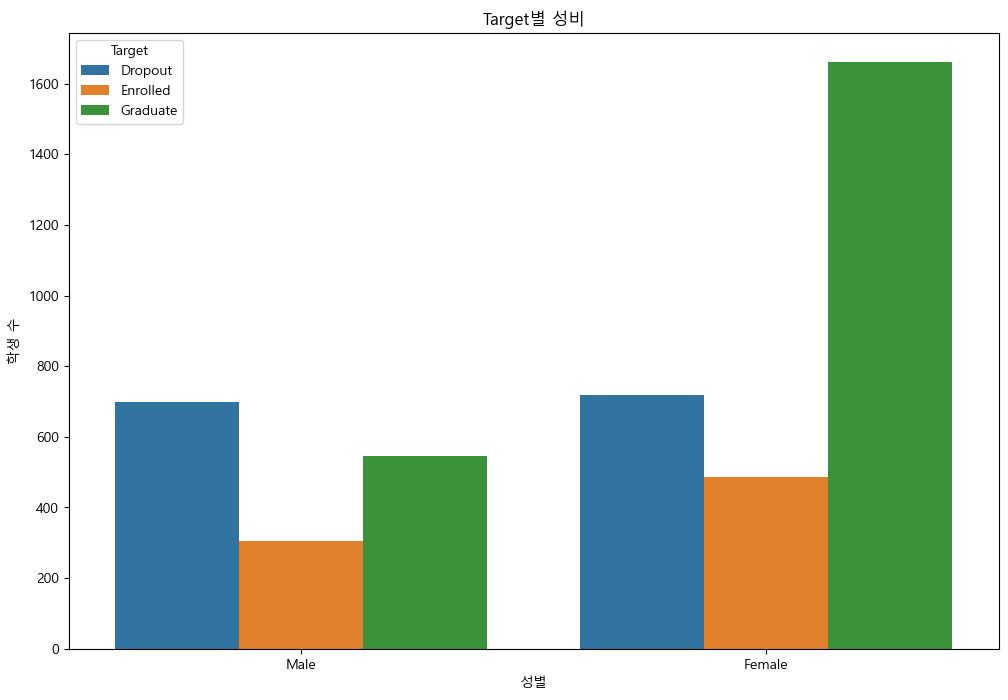

In [321]:
# 그래프 그리기
g = sns.countplot(
    data=dropout_remove,
    x="Gender", hue="Target", hue_order=['Dropout', 'Enrolled', 'Graduate']
)
g.set(xlabel="성별", ylabel="학생 수", title="Target별 성비")

# plotly로 막대그래프 그리기
- Target별 성비

In [353]:
pivot_df = pd.DataFrame(dropout_remove.groupby(['Target', 'Gender']).size().reset_index())
pivot_df.columns = ['Target', 'Gender', 'cnt']
pivot_df

,Target,Gender,cnt
0,Dropout,Female,719
1,Dropout,Male,698
2,Enrolled,Female,486
3,Enrolled,Male,306
4,Graduate,Female,1661
5,Graduate,Male,546


In [328]:
#dropout_remove.groupby(['Target', 'Gender']).size().reset_index().pivot(columns = 'Gender', index = 'Target', values=0).rename(index = {0: 'count'})
dropout_remove.groupby(['Target', 'Gender']).size().reset_index()

,Target,Gender,0
0,Dropout,Female,719
1,Dropout,Male,698
2,Enrolled,Female,486
3,Enrolled,Male,306
4,Graduate,Female,1661
5,Graduate,Male,546


In [320]:
# 그래프 그리기
fig = px.bar(pivot_df, x="Gender", y=0, color="Target", title="Target별 성비")
fig.update_layout(yaxis_title="학생 수")
fig.show()

In [364]:
trace1 = go.Bar(x = pivot_df[pivot_df['Target'] == 'Dropout'].Gender,
                y = pivot_df[pivot_df['Target'] == 'Dropout'].cnt,
                name = 'Dropout')

trace2 = go.Bar(x = pivot_df[pivot_df['Target'] == 'Enrolled'].Gender,
                y = pivot_df[pivot_df['Target'] == 'Enrolled'].cnt,
                name = 'Enrolled')

trace3 = go.Bar(x = pivot_df[pivot_df['Target'] == 'Graduate'].Gender,
                y = pivot_df[pivot_df['Target'] == 'Graduate'].cnt,
                name = 'Graduate')

data = [trace1, trace2, trace3]
layout = go.Layout(title = "Target별 성비")
fig = go.Figure(data=data, layout=layout)
fig

## 결혼 상태에 따른 Target 변수 비율

In [401]:
pivot_df2

,Target,Marital status,cnt
0,Dropout,Divorced,42
1,Dropout,Facto Union,11
2,Dropout,Legally Seperated,4
3,Dropout,Married,179
4,Dropout,Single,1180
5,Dropout,Widower,1
6,Enrolled,Divorced,16
7,Enrolled,Facto Union,3
8,Enrolled,Legally Seperated,1
9,Enrolled,Married,52


Text(0.5, 1.0, 'Target별 성비')

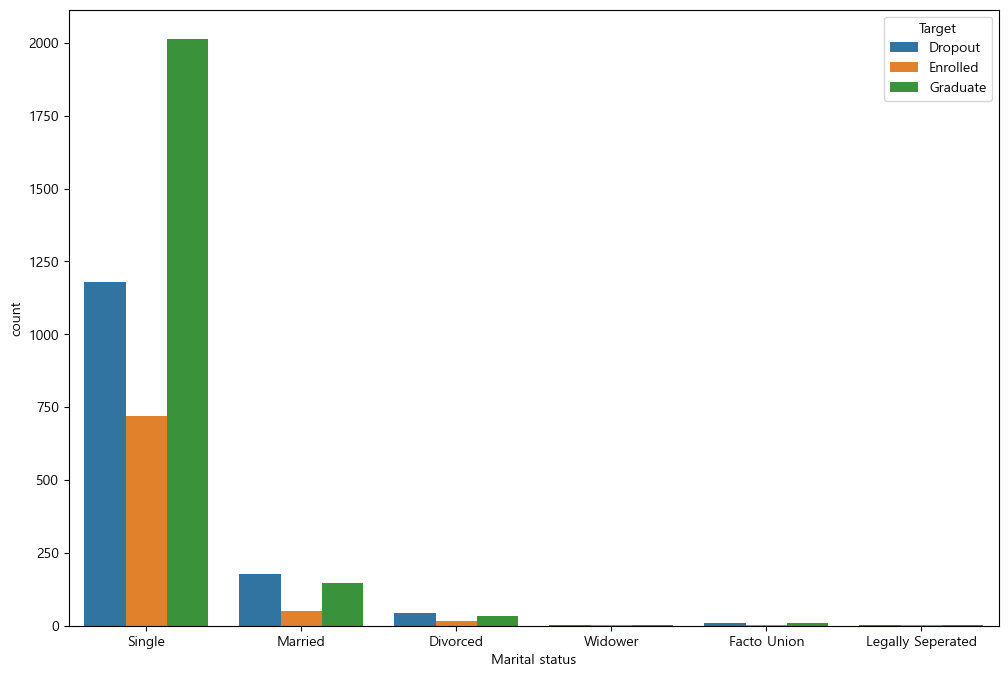

In [408]:
# 그래프 그리기
sns.countplot(
    data=dropout_remove,
    x="Marital status", hue="Target",
    hue_order=['Dropout', 'Enrolled', 'Graduate']
)
plt.set_xlabel('성별')#xlabel("성별")
plt.set_ylabel("학생 수")
plt.set_title("Target별 성비")

Target             Dropout  Enrolled  Graduate
Marital status                                
Divorced                42        16        33
Facto Union             11         3        11
Legally Seperated        4         1         1
Married                179        52       148
Single                1180       718      2013
Widower                  1         2         1


[Text(0.5, 0, '결혼 상태'),
 Text(0, 0.5, '학생 수'),
 Text(0.5, 1.0, '결혼 상태에 따른 Target 변수 비율')]

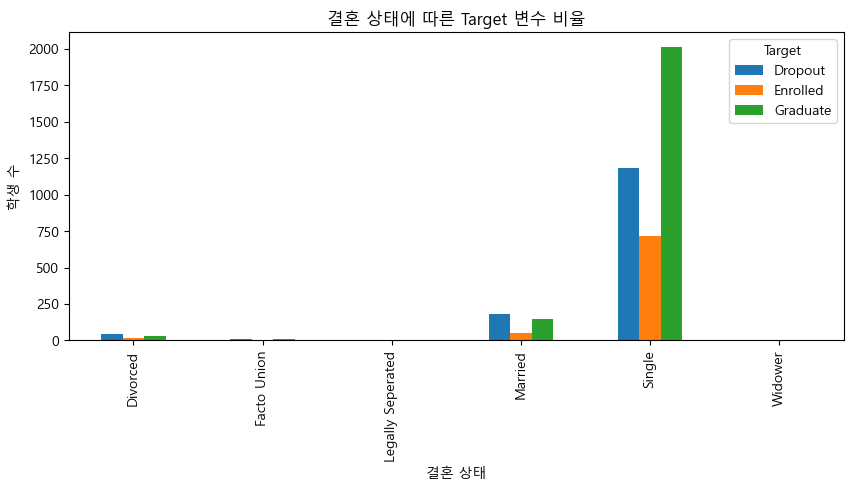

In [476]:
marital_df = pd.crosstab(dropout_remove['Marital status'], dropout_remove['Target'])
print(marital_df)
g = marital_df.plot(kind = 'bar', figsize = (10,4))

g.set(xlabel='결혼 상태', ylabel= "학생 수", title = "결혼 상태에 따른 Target 변수 비율")
#g.set_xticks(ticks = [0,1,2,3,4,5], labels = ['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'])

### 결혼 상태에 따른 Target 변수 비율 구하기 -> plotly 라이브러리 사용

In [360]:
def change_matrial_val(values):
    if values == 1:
        return 'Single'
    elif values == 2:
        return 'Married'
    elif values == 3:
        return 'Widower'
    elif values == 4:
        return 'Divorced'
    elif values == 5:
        return 'Facto Union'
    elif values == 6:
        return 'Legally Seperated'

In [365]:
pivot_df2 = pd.DataFrame(dropout_remove.groupby(['Target', 'Marital status']).size().reset_index())
pivot_df2.columns = ['Target', 'Marital status', 'cnt']
pivot_df2

,Target,Marital status,cnt
0,Dropout,Divorced,42
1,Dropout,Facto Union,11
2,Dropout,Legally Seperated,4
3,Dropout,Married,179
4,Dropout,Single,1180
5,Dropout,Widower,1
6,Enrolled,Divorced,16
7,Enrolled,Facto Union,3
8,Enrolled,Legally Seperated,1
9,Enrolled,Married,52


In [363]:
dropout_remove['Marital status'] = dropout_remove['Marital status'].apply(change_matrial_val)

In [378]:
trace1 = go.Bar(x = pivot_df2[pivot_df2['Target'] == 'Dropout']['Marital status'],
                y = pivot_df2[pivot_df2['Target'] == 'Dropout'].cnt,
                name = 'Dropout')

trace2 = go.Bar(x = pivot_df2[pivot_df2['Target'] == 'Enrolled']['Marital status'],
                y = pivot_df2[pivot_df2['Target'] == 'Enrolled'].cnt,
                name = 'Enrolled')

trace3 = go.Bar(x = pivot_df2[pivot_df2['Target'] == 'Graduate']['Marital status'],
                y = pivot_df2[pivot_df2['Target'] == 'Graduate'].cnt,
                name = 'Graduate')

data = [trace1, trace2, trace3]
layout = go.Layout(barmode= 'group', title = "결혼 상태에 따른 Target 변수 비율" )
fig = go.Figure(data=data, layout=layout)
fig

## 전공에 따른 Target 비율

In [395]:
# course_remove = dropout_remove.groupby(by = ['Course', 'Target']).count().reset_index().set_index('Course')
# course_remove = course_remove.loc[:, ['Target', 'ID']]
# course_remove

,Target,ID
Course,,
1.0,Dropout,8
1.0,Enrolled,5
1.0,Graduate,12
2.0,Dropout,82
2.0,Enrolled,37
2.0,Graduate,96
3.0,Dropout,71
3.0,Enrolled,21
3.0,Graduate,123


In [424]:
course_remove = dropout_remove.groupby(by = ['Course', 'Target']).size().reset_index().pivot(columns = 'Target',
                                                                                             index = 'Course',
                                                                                             values = 0)

In [425]:
course_remove

Target,Dropout,Enrolled,Graduate
Course,,,
1.0,8,5,12
2.0,82,37,96
3.0,71,21,123
4.0,85,37,87
5.0,51,41,133
6.0,90,75,171
7.0,92,64,14
8.0,78,20,41
9.0,133,107,138


In [426]:
course_remove = course_remove.rename(index={
    1:'Biofuel Production Technologies',
    2:'Animation and Multimedia Design',
    3:'Social Service (Evening Attendance)',
    4:'Agronomy',5:'Communication Design',
    6:'Veterinary Nursing',
    7:'Informatics Engineering',
    8:'Equiniculture',
    9:'Management',
    10:'Social Service',
    11:'Tourism',
    12:'Nursing',
    13:'Oral Hygiene',
    14:'Advertising and Marketing Management',
    15:'Journalism and Communication',
    16:'Basic Education',
    17:'Management (Evening Attendance)'})

In [427]:
course_remove

Target,Dropout,Enrolled,Graduate
Course,,,
Biofuel Production Technologies,8,5,12
Animation and Multimedia Design,82,37,96
Social Service (Evening Attendance),71,21,123
Agronomy,85,37,87
Communication Design,51,41,133
Veterinary Nursing,90,75,171
Informatics Engineering,92,64,14
Equiniculture,78,20,41
Management,133,107,138


In [428]:
# 열을 기준으로 각 범주별 총합 계산
course_remove_total = course_remove.sum(axis=1)

# 총합을 기준으로 오름차순 정렬
course_remove_sorted = course_remove_total.sort_values(ascending=True)

In [430]:
course_remove_sorted

Course
Biofuel Production Technologies          25
Oral Hygiene                             85
Equiniculture                           139
Informatics Engineering                 170
Basic Education                         191
Agronomy                                209
Animation and Multimedia Design         215
Social Service (Evening Attendance)     215
Communication Design                    225
Tourism                                 252
Advertising and Marketing Management    267
Management (Evening Attendance)         268
Journalism and Communication            327
Veterinary Nursing                      336
Social Service                          355
Management                              378
Nursing                                 759
dtype: int64

[Text(0.5, 0, '학생 수'), Text(0.5, 1.0, '전공 별 Target 비율')]

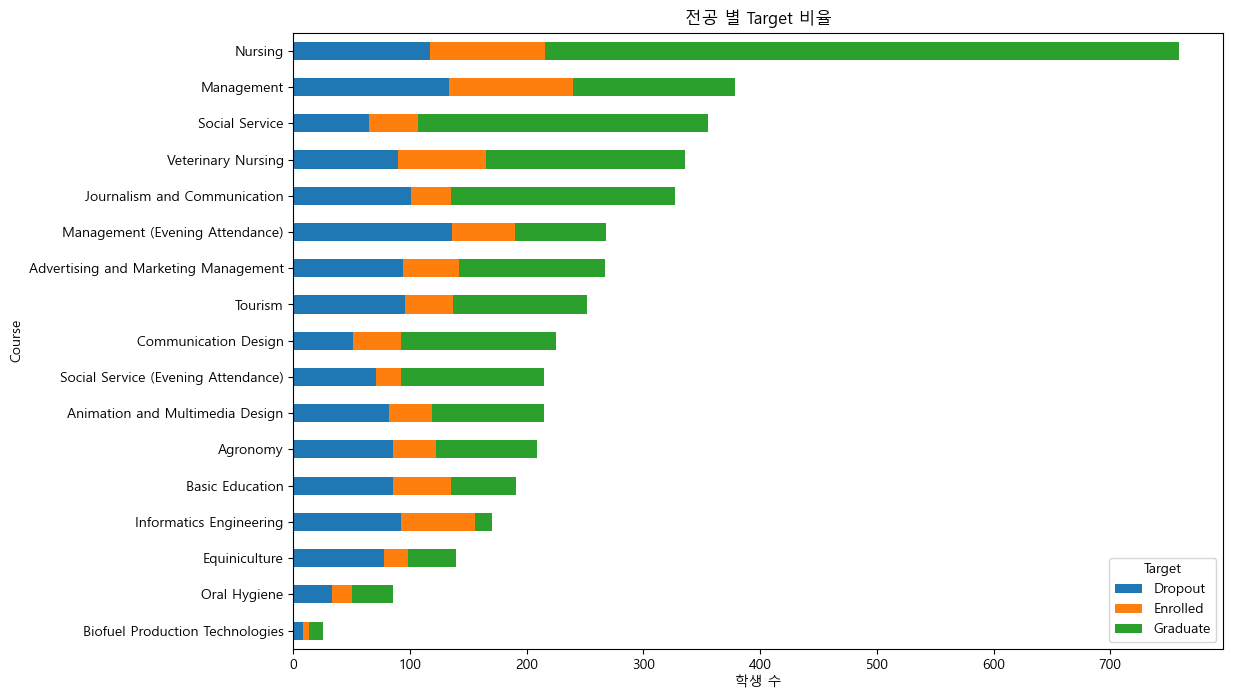

In [471]:
# 그래프 그리기
g = course_remove.loc[course_remove_sorted.index].plot(kind='barh', stacked=True)
g.set(xlabel='학생 수', title="전공 별 Target 비율")

### 전공에 따른 Target 비율 -> plotly 라이브러리 사용

In [440]:
course_df = dropout_remove.groupby(by = ['Course', 'Target']).size().reset_index().rename(columns = {0:'ID'})
course_df

,Course,Target,ID
0,1.0,Dropout,8
1,1.0,Enrolled,5
2,1.0,Graduate,12
3,2.0,Dropout,82
4,2.0,Enrolled,37
5,2.0,Graduate,96
6,3.0,Dropout,71
7,3.0,Enrolled,21
8,3.0,Graduate,123
9,4.0,Dropout,85


In [441]:
name_list = ['Biofuel Production Technologies',
    'Animation and Multimedia Design',
    'Social Service (Evening Attendance)',
    'Agronomy',
    'Communication Design',
    'Veterinary Nursing',
    'Informatics Engineering',
    'Equiniculture',
    'Management',
    'Social Service',
    'Tourism',
    'Nursing',
    'Oral Hygiene',
    'Advertising and Marketing Management',
    'Journalism and Communication',
    'Basic Education',
    'Management (Evening Attendance)']

In [447]:
def change_course_val(values):
    for idx in range(2, 18):
        if values == 1:
            return 'Biofuel Production Technologies'
        elif values == idx:
            return name_list[idx - 1]

In [450]:
course_df['Course'] = course_df['Course'].apply(change_course_val)

In [455]:
# 그래프 그리기
fig = px.bar(course_df, x="Course", y ="ID", color="Target", title="전공에 따른 Target 비율")
fig.update_layout(yaxis_title="학생 수")
fig.show()

### 국적에 따른 Target 비율

- 포르투칼인이 압도적으로 많아 예측률에 큰 영향은 못 줄 것으로 보임

In [557]:
nation_df = dropout_remove.groupby(by = ['Nationality', 'Target']).size().reset_index()
nation_df.columns=['Nationality', 'Target', 'cnt']

In [552]:
nation_df = nation_df.rename(index={1:'Portuguese',
                                    2:'German',
                                    3:'Spanish',
                                    4:'Italian',
                                    5:'Dutch',
                                    6:'English',
                                    7:'Lithuanian',
                                    8:'Angolan',
                                    9:'Cape Verdean',
                                    10:'Guinean',
                                    11:'Mozambican',
                                    12:'Santomean',
                                    13:'Turkish',
                                    14:'Brazilian',
                                    15:'Romanian',
                                    16:'Moldova',
                                    17:'Mexican',
                                    18:'Ukrainian',
                                    19:'Russian',
                                    20:'Cuban', 
                                    21:'Colombian'})

In [566]:
nation_df

,Nationality,Target,cnt
0,Angolan,Dropout,1
1,Angolan,Enrolled,1
2,Brazilian,Dropout,14
3,Brazilian,Enrolled,6
4,Brazilian,Graduate,18
5,Cape Verdean,Dropout,4
6,Cape Verdean,Enrolled,1
7,Cape Verdean,Graduate,8
8,Colombian,Dropout,1
9,Cuban,Enrolled,1


### 국적에 따른 Target 비율 -> plotly 라이브러리 사용

In [568]:
# 그래프 그리기
fig = px.bar(nation_df, x="Nationality", y="cnt", color="Target", title="국적에 따른 Target 비율")
fig.update_layout(yaxis_title="학생 수")
fig.show()

In [618]:
df_plot = dropout_remove.groupby(by = ['Nationality', 'Target']).size().reset_index().pivot(columns='Target', index='Nationality', values=0)

In [590]:
df_plot = df_plot.rename(index={1:'Portuguese',
                                    2:'German',
                                    3:'Spanish',
                                    4:'Italian',
                                    5:'Dutch',
                                    6:'English',
                                    7:'Lithuanian',
                                    8:'Angolan',
                                    9:'Cape Verdean',
                                    10:'Guinean',
                                    11:'Mozambican',
                                    12:'Santomean',
                                    13:'Turkish',
                                    14:'Brazilian',
                                    15:'Romanian',
                                    16:'Moldova',
                                    17:'Mexican',
                                    18:'Ukrainian',
                                    19:'Russian',
                                    20:'Cuban', 
                                    21:'Colombian'})

In [621]:
df_plot

Target,Dropout,Enrolled,Graduate
Nationality,,,
Angolan,1.0,1.0,NaN
Brazilian,14.0,6.0,18.0
Cape Verdean,4.0,1.0,8.0
Colombian,1.0,NaN,NaN
Cuban,NaN,1.0,NaN
Dutch,NaN,NaN,1.0
English,NaN,NaN,1.0
German,NaN,NaN,2.0
Guinean,1.0,NaN,4.0


<Axes: xlabel='Nationality'>

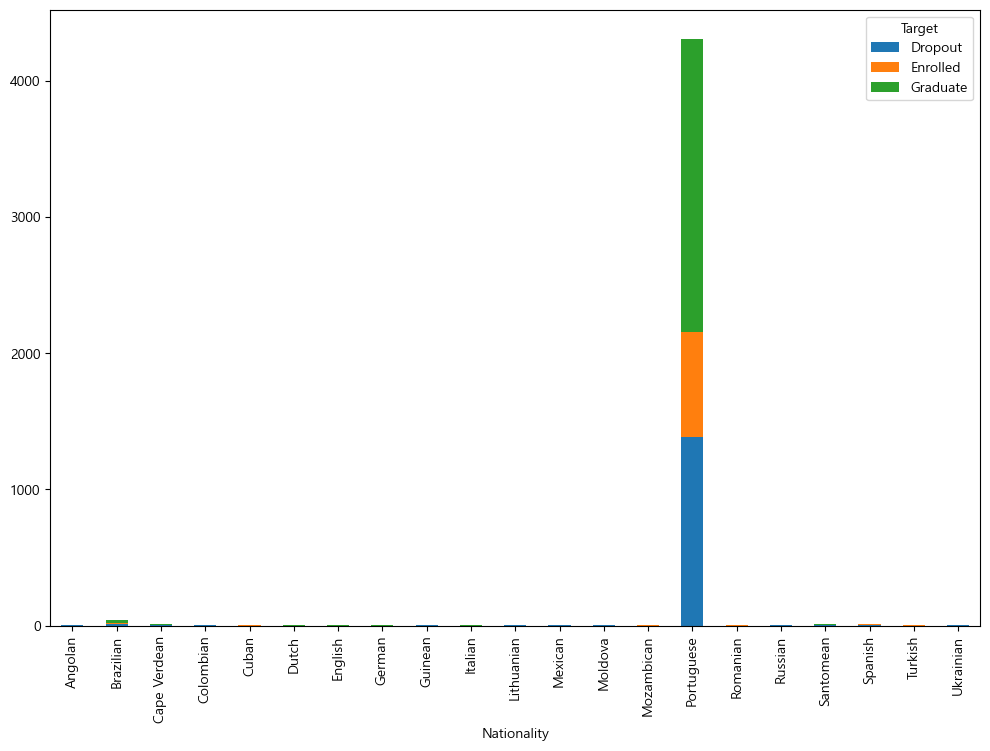

In [592]:
# 그래프 그리기
df_plot.plot(kind='bar', stacked=True)

## 연령대 분포도 그리기

In [596]:
dropout_remove['Age at enrollment']

0       20.0
1       19.0
2       19.0
3       20.0
4       45.0
        ... 
4419    19.0
4420    18.0
4421    30.0
4422    20.0
4423    22.0
Name: Age at enrollment, Length: 4416, dtype: float64

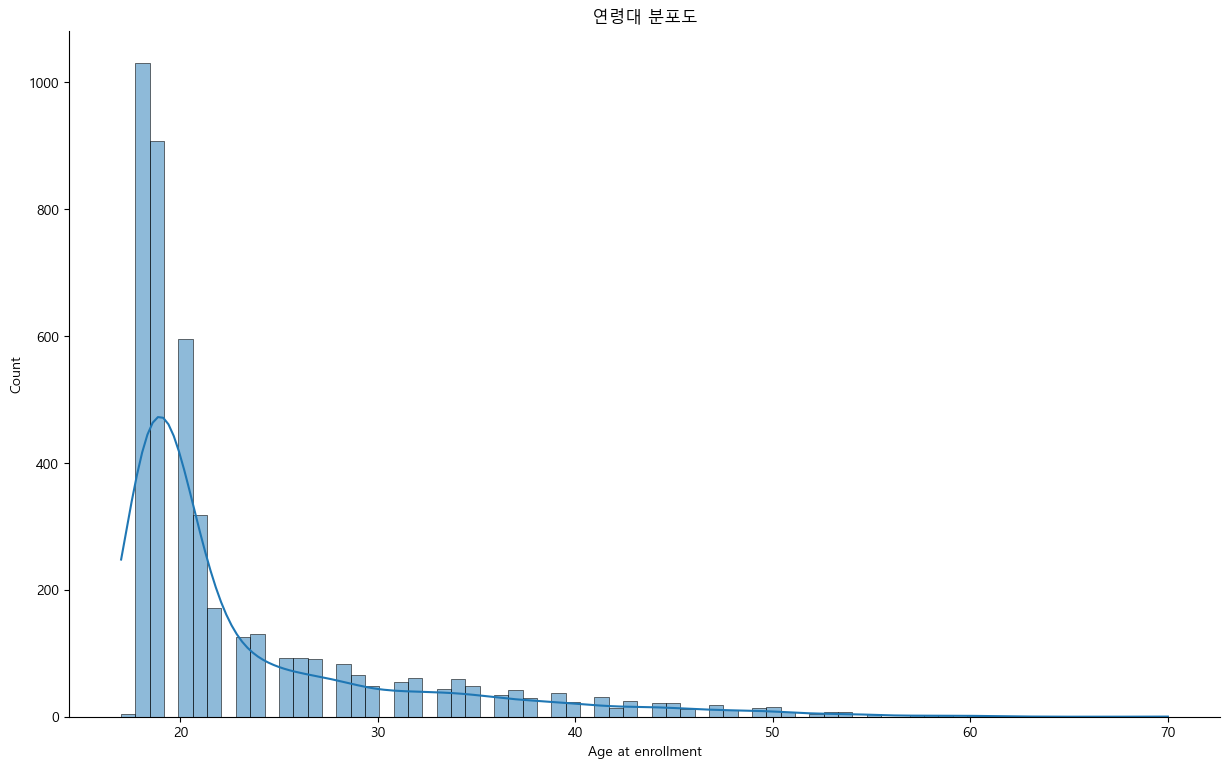

In [605]:
fig = sns.displot(data = dropout_remove, x = 'Age at enrollment', kde = True)
fig.fig.set_size_inches(14, 8)
fig.set(title="연령대 분포도")

[Text(0.5, 1.0, '연령대 분포도')]

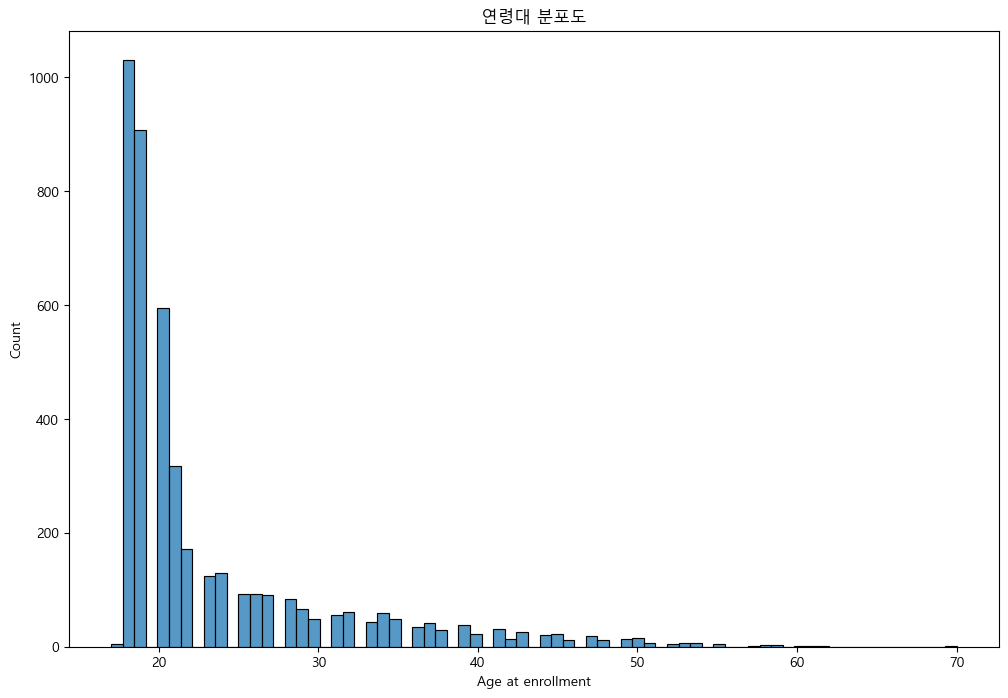

In [614]:
# 그래프 그리기
g = sns.histplot(
    data=dropout_remove,
    x="Age at enrollment"
)
g.set(title="연령대 분포도")

### 연령대 분포도 그리기 -> plotly 라이브러리 사용

In [606]:
import plotly.figure_factory as ff

In [612]:
# 그래프 그리기
student_cnt = dropout_remove.groupby(by= ['Age at enrollment']).size().reset_index().rename(columns = {0: 'cnt'}).astype({'Age at enrollment' : 'object'})

In [613]:
fig = px.histogram(student_cnt, x = 'Age at enrollment',
                  y = 'cnt',
                  marginal='box', nbins = 50)
fig.update_layout(bargap=0.2)
fig

# ------------------------------------------------------------------------------------------------------------

# 히트맵 그리기 -> 변수 선택

In [665]:
# 인구통계학 데이터

demo_data = dropout_remove[["Marital status", "Nationality", "Displaced", "Gender", "Age at enrollment", "International", "Target"]]

# 사회-경제 데이터
se_data = dropout_remove[["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder", "Target"]]

# 미시경제 데이터
me_data = dropout_remove[['Unemployment rate', 'Inflation rate', 'GDP', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Target']]

# 학업 데이터
academic_data = dropout_remove[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]

### 인구통계학 데이터 히트맵

C:\Users\pg627\AppData\Local\Temp\ipykernel_13664\1380431613.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



[Text(0.5, 1.0, '인구 통계학 데이터 - 히트맵')]

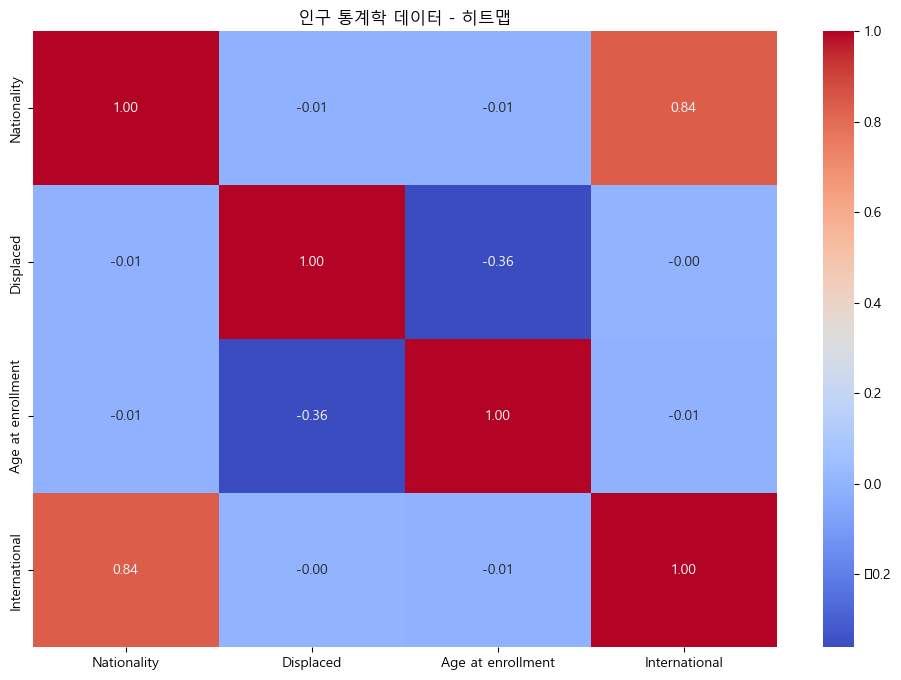

In [468]:
# 그래프 그리기
#plt.figure(figsize=(7,5))
g = sns.heatmap(demo_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
g.set( title="인구 통계학 데이터 - 히트맵")

### 사회-경제 데이터 히트맵

C:\Users\pg627\AppData\Local\Temp\ipykernel_13664\963884454.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



[Text(0.5, 1.0, '사회-경제 데이터 - 히트맵')]

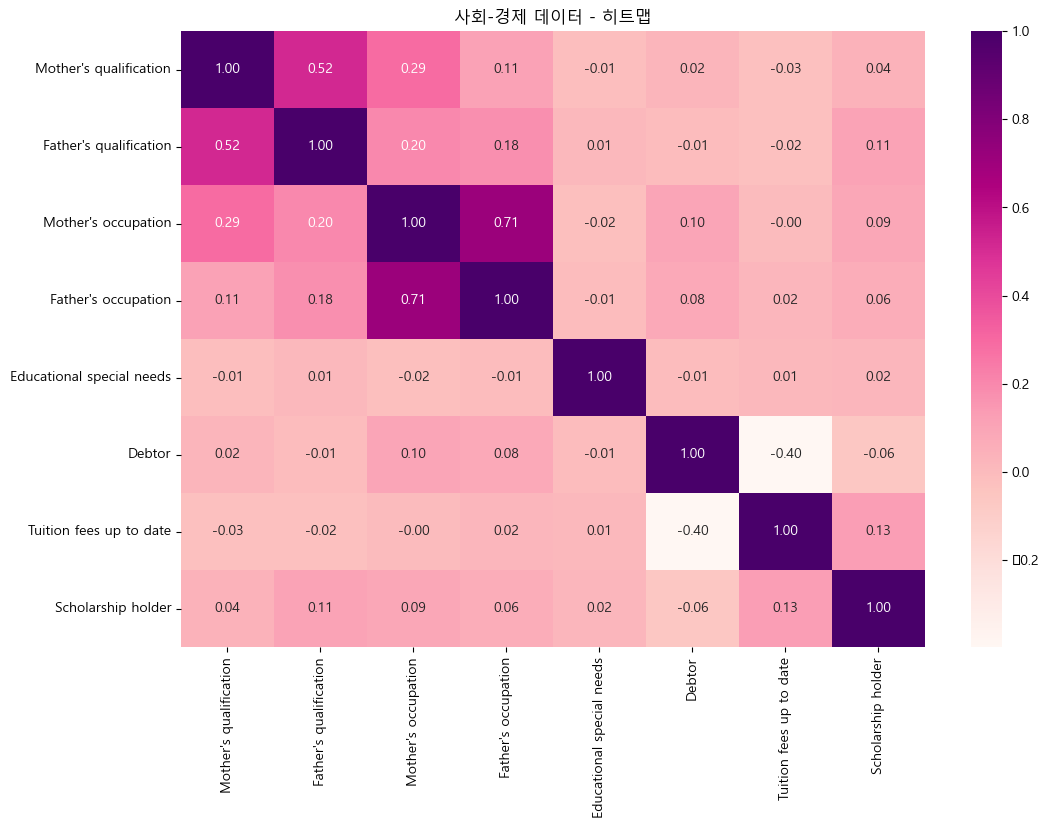

In [659]:
# 그래프 그리기
g = sns.heatmap(se_data.corr(), annot=True, cmap='RdPu', fmt='.2f')
g.set( title="사회-경제 데이터 - 히트맵")

### 미시경제 데이터 히트맵

C:\Users\pg627\AppData\Local\Temp\ipykernel_13664\4088542101.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



[Text(0.5, 1.0, '미시경제 데이터 - 히트맵')]

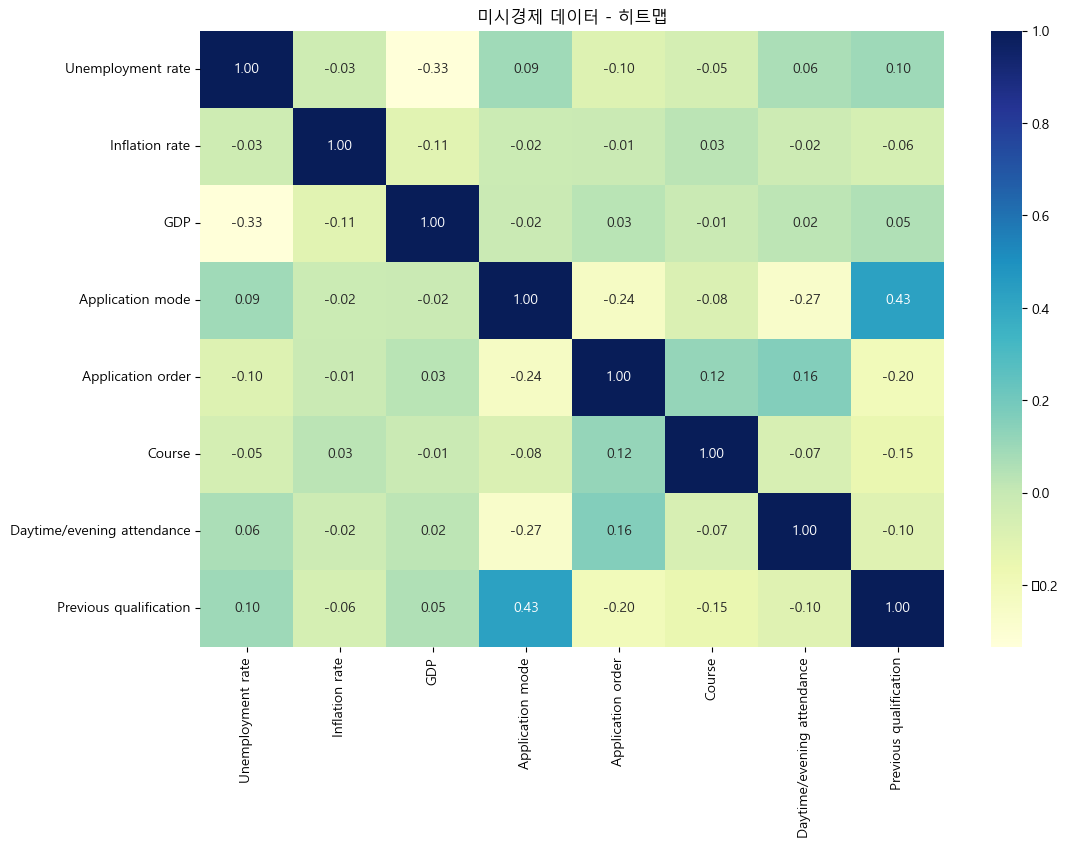

In [608]:
# 그래프 그리기
g = sns.heatmap(me_data.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
g.set( title="미시경제 데이터 - 히트맵")

### 학업 데이터 히트맵

C:\Users\pg627\AppData\Local\Temp\ipykernel_13664\3483862260.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



[Text(0.5, 1.0, '학업 데이터 - 히트맵')]

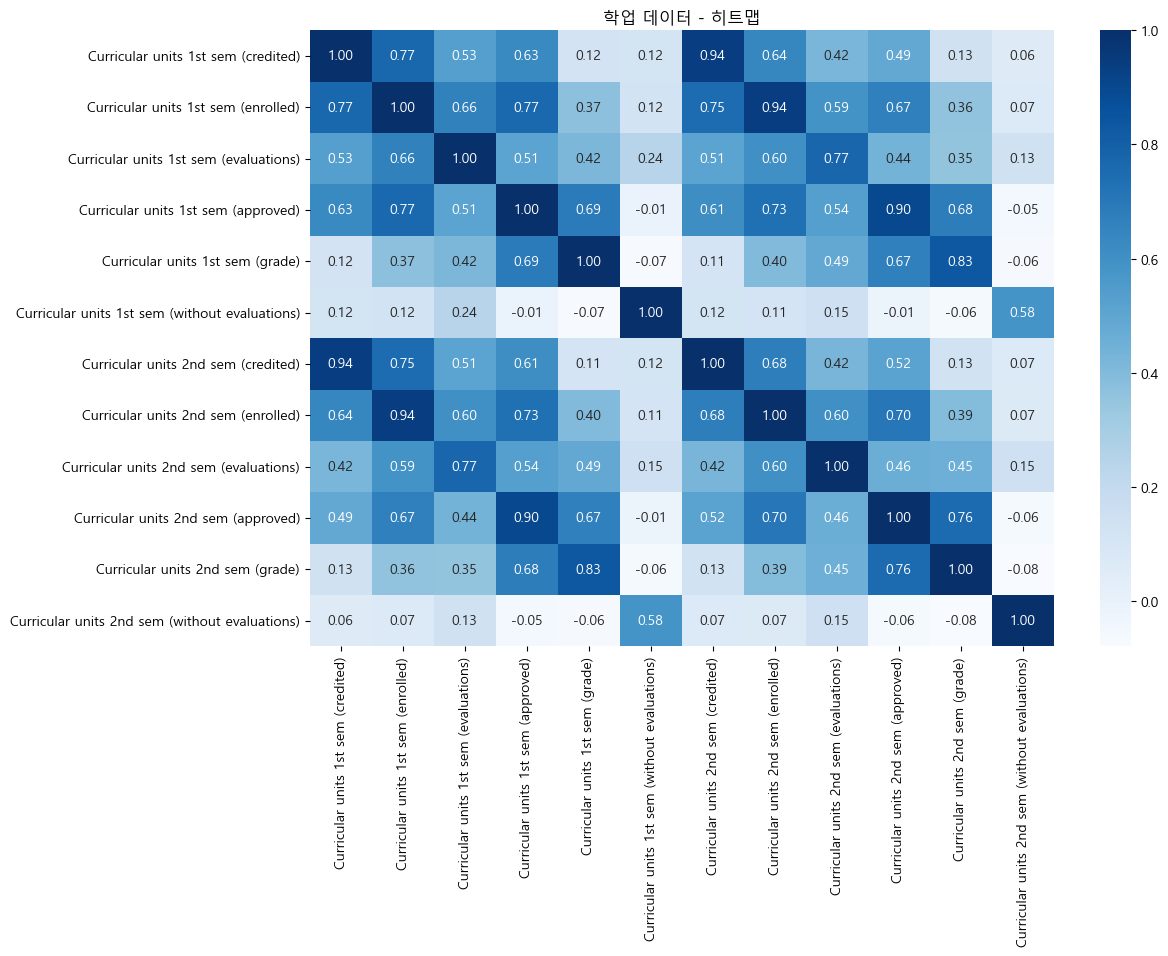

In [666]:
# 그래프 그리기
g = sns.heatmap(academic_data.corr(), annot=True, cmap='Blues', fmt='.2f')
g.set( title="학업 데이터 - 히트맵")

# 변수 선택

- 중복성 제거와 과적합 방지를 위해 유사한 상관계수를 가진 변수들 제거

In [662]:
academic_data.columns

Index(['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target'],
      dtype='object')

In [667]:
# 삭제 필요한 컬럼 리스트
need_to_remove_col = ['Curricular units 1st sem (credited)',
                      'Curricular units 1st sem (enrolled)',
                      'Curricular units 1st sem (evaluations)',
                      'Curricular units 1st sem (approved)',
                      'Curricular units 1st sem (grade)',
                      'Nationality']

In [669]:
dropout_remove.drop(need_to_remove_col, axis=1, inplace=True)

In [670]:
dropout_remove['Target'].value_counts()

Graduate    2207
Dropout     1417
Enrolled     792
Name: Target, dtype: int64

# -------------------------------------------------------------------------------------------------------------

# 데이터 처리

1. 컬럼별 타입 확인
- 문자형, 수치형 확인

2. 컬럼별 결측치 확인
- 컬럼별 결측치 비율 확인 후 제거 판별

3. 결측치 대체 방법 확인
- 문자형(빈도) / 수치형(평균, 최대/최소값, 최빈값 등)

4. 결측치 대치 후 최종 확인
- 결측치 유무 확인

5. 변수 선택
- 상관분석 등 기타 분석을 통해 변수 선택 및 제거 진행

6. 최종 데이터 확인
- 모델 학습 및 테스트를 위한 최종 데이터 확인

# -------------------------------------------------------------------------------------------------------------

# Modeling

### Label Encoding -> Categorical variable

In [671]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report

import copy

In [673]:
copy.deepcopy(dropout_remove)

,ID,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,37c5fefa-df8e-4dcc-aec7-60000f2198e4,Male,Dropout,1.0,8.0,5.0,2.0,1.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,Male,Graduate,1.0,6.0,1.0,11.0,1.0,1.0,1.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,37ddd4c5-ab63-4b43-8df7-24e98f39f25b,Male,Dropout,1.0,1.0,5.0,5.0,1.0,1.0,22.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,37fafa03-d77a-4723-89aa-84a8277379c5,Female,Graduate,1.0,8.0,2.0,15.0,1.0,1.0,23.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,382cc9e8-e885-4bcd-ae4d-a3846c35097b,Female,Graduate,2.0,12.0,1.0,3.0,0.0,1.0,22.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,e7592d77-b53d-4496-a276-0fb6afdd7265,Male,Graduate,1.0,1.0,6.0,15.0,1.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
4420,e76231d5-8450-4424-b344-daac4b02845b,Female,Dropout,1.0,1.0,2.0,15.0,1.0,1.0,1.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
4421,e77542f6-e166-46a6-ba62-903e0740631e,Female,Dropout,1.0,1.0,1.0,12.0,1.0,1.0,22.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
4422,e7d809db-983c-4db5-b32a-64698a39a5aa,Female,Graduate,1.0,1.0,1.0,9.0,1.0,1.0,22.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


### 범주형 변수 - Label Encoding

In [735]:
dropout = copy.deepcopy(dropout_remove)

encoder = LabelEncoder()
dropout['Target'] = encoder.fit_transform(dropout['Target'])
dropout['Gender'] = encoder.fit_transform(dropout['Gender'])

In [746]:
# pd.get_dummies(df, columns=[컬럼명])
dropout = pd.get_dummies(dropout, columns=['Gender'])

### target variable & input variable 나누기

In [736]:
ID = dropout['ID']
X = dropout.drop(['Target', 'ID'], axis=1)
y = dropout['Target']

### Split train / test dataset

In [737]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

### Feature Scaling


- 스케일링할 때 범주형 변수는 제외!!!
- 수치형 변수만 스케일링 적용

In [738]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [739]:
X_train

array([[0.        , 0.2       , 0.64705882, ..., 0.40697674, 0.31111111,
        0.80317041],
       [0.        , 0.        , 0.70588235, ..., 0.        , 0.75555556,
        0.57859974],
       [0.        , 0.        , 0.        , ..., 0.40697674, 0.31111111,
        0.80317041],
       ...,
       [0.        , 0.        , 0.41176471, ..., 1.        , 0.24444444,
        0.41479524],
       [0.        , 0.        , 0.29411765, ..., 0.15116279, 0.48888889,
        1.        ],
       [0.        , 0.2       , 0.64705882, ..., 0.        , 0.75555556,
        0.57859974]])

### Build Model

In [740]:
# 모델 불러오기, 정의
DT = DecisionTreeClassifier()

# 학습 데이터로 모델(Decision Tree) 학습
DT.fit(X_train, y_train)

# 학습된 모델로 test 결과값 출력
y_pred = DT.predict(X_test)

### 예측 결과 확인 (모델 성능 평가)

### * average 옵션

1. micro : 전체 평균
2. macro : 라벨 별 각 합의 평균
3. None : 각 라벨별 평균

### Accuracy, Precision, Recall 계산

In [741]:
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred, average='macro'), 3)
recall = round(recall_score(y_test, y_pred, average='macro'), 3)

print('accuracy : ', accuracy, '\n',
     'precision : ', precision, '\n',
     'recall : ', recall)

accuracy :  0.688 
 precision :  0.633 
 recall :  0.633


In [742]:
y_test = y_test.astype(int).tolist()
y_pred = y_pred.astype(int).tolist()

model_report = classification_report(y_test, y_pred)
print(model_report)

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       420
           1       0.41      0.41      0.41       240
           2       0.77      0.77      0.77       665

    accuracy                           0.69      1325
   macro avg       0.63      0.63      0.63      1325
weighted avg       0.69      0.69      0.69      1325



### Roc 커브 그리기

In [743]:
Y_scores = DT.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label=2)
roc_auc = auc(fpr, tpr)

TypeError: 'str' object is not callable

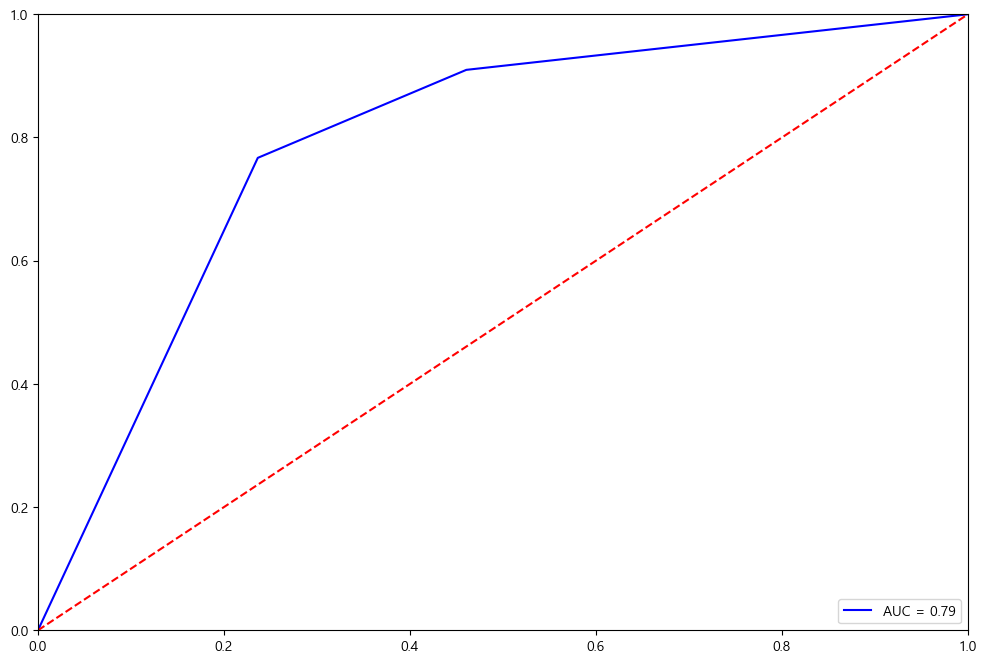

In [744]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('Tru Positive Rate')
plt.title('ROC Curve of NAIVE BAYES')
plt.show()